In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
try:
    conn = psycopg2.connect(user="cohort17",
                            password="Cohort17Movies",
                            host="moviesdb.ce8d6g1pa5lm.us-east-1.rds.amazonaws.com",
                            port="5432",database="moviesdb")

    dbquery = "select * from modeling_data"
    
    df = pd.read_sql_query(dbquery, conn)

except (Exception, psycopg2.Error) as error :
    print ("Error while fetching data from PostgreSQL", error)

finally:
    if(conn):
        conn.close()

In [3]:
pd.options.display.max_columns = 999
df.dropna(subset=['domesticgross'], inplace=True)
df.head()

,primarytitle,domesticgross,productionbudget,releasedate,startyear,studio,runtimeminutes,genre1,genre2,genre3,keyword1,keyword2,keyword3,keywords,name1,name2,name3,name5
0,Halloween: Resurrection,30259652,15000000,"Jul 12, 2002",2002,Other,94.0,Horror,Thriller,,Other,,,Teenage Slasher,Other,Other,Other,Other
1,Halloween,159342015,10000000,"Oct 17, 2018",2018,Other,106.0,Horror,Thriller,,Other,Other,Other,"Serial Killer, Supernatural, Teenage Slasher, ...",Other,Other,Other,David Gordon Green
2,Halloween,159342015,10000000,"Oct 17, 2018",2018,Other,106.0,Horror,Thriller,,Other,Other,,"Teenage Slasher, Reboot",Other,Other,Other,David Gordon Green
3,Freaky Friday,110222438,26000000,"Aug 6, 2003",2003,BV,97.0,Comedy,Family,Fantasy,Other,,,Body Swap,Other,Other,Other,Other
4,Titan A.E.,22751979,75000000,"Jun 16, 2000",2000,Fox,94.0,Action,Adventure,Other,,,,,Matt Damon,Drew Barrymore,Other,Other


In [4]:
df.describe()

,domesticgross,productionbudget,startyear,runtimeminutes
count,2.984000e+03,2.984000e+03,2984.000000,2970.000000
mean,5.763426e+07,4.477489e+07,2009.314678,106.999663
std,8.031871e+07,5.016769e+07,5.520010,18.205490
min,0.000000e+00,7.000000e+03,2000.000000,15.000000
25%,8.592792e+06,1.095000e+07,2005.000000,94.000000
50%,3.209077e+07,2.800000e+07,2009.000000,104.000000
75%,7.088167e+07,6.000000e+07,2014.000000,117.000000
max,8.583730e+08,4.106000e+08,2020.000000,219.000000


(array([1.052e+03, 5.060e+02, 3.890e+02, 2.730e+02, 1.660e+02, 1.100e+02,
        9.100e+01, 7.000e+01, 4.900e+01, 5.000e+01, 4.600e+01, 2.600e+01,
        2.600e+01, 1.800e+01, 1.300e+01, 1.300e+01, 9.000e+00, 9.000e+00,
        9.000e+00, 1.400e+01, 6.000e+00, 7.000e+00, 4.000e+00, 7.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.0000000e+00, 1.7167460e+07, 3.4334920e+07, 5.1502380e+07,
        6.8669840e+07, 8.5837300e+07, 1.0300476e+08, 1.2017222e+08,
        1.3733968e+08, 1.5450714e+08, 1.7167460e+08, 1.8884206e+08,
        2.0600952e+08, 2.2317698e+08, 2.4034444e+08, 2.5751190e+08,
        2.7467936e+08, 2.9184682e+08, 3.0901428e+08, 3.2618174e+08,
        3.4334920e+08, 3.6051666e+08

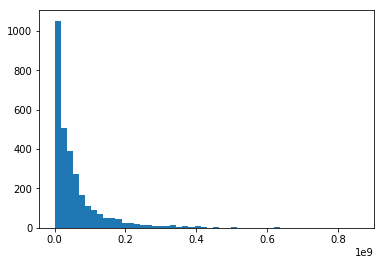

In [5]:
plt.hist(df['domesticgross'], bins=50)

In [6]:
df['name1'].value_counts()

Other                  2340
Nicolas Cage             25
Mark Wahlberg            23
Adam Sandler             22
Denzel Washington        21
George Clooney           19
Matt Damon               19
Dwayne Johnson           19
Bruce Willis             18
Will Smith               18
Robert De Niro           18
Ben Stiller              18
Will Ferrell             17
Ben Affleck              17
Tom Hanks                16
Keanu Reeves             16
Tom Cruise               16
Leonardo DiCaprio        15
Steve Carell             15
Johnny Depp              15
Jake Gyllenhaal          15
Vin Diesel               14
Robert Downey Jr.        14
Jason Statham            14
Matthew McConaughey      14
Christian Bale           13
Reese Witherspoon        13
Russell Crowe            13
Samuel L. Jackson        12
Ice Cube                 12
Owen Wilson              12
Brad Pitt                12
Sandra Bullock           12
Jackie Chan              12
Colin Farrell            11
Jack Black          

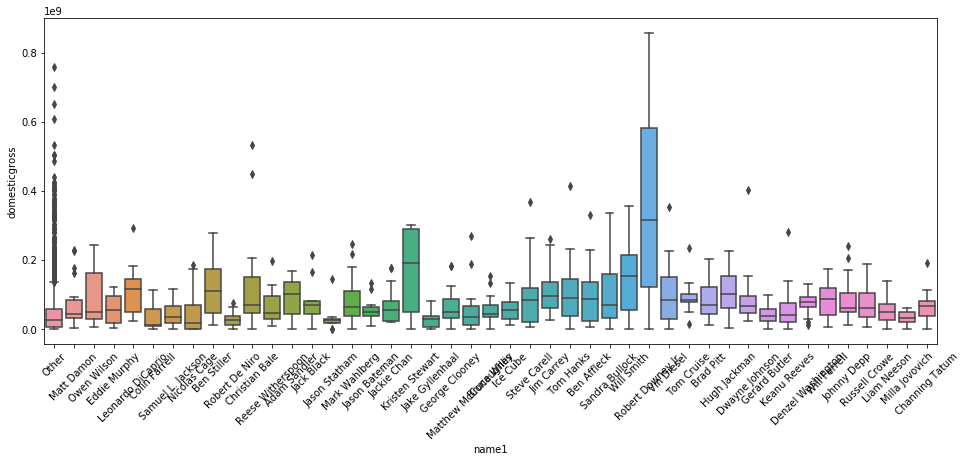

In [7]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='name1')

In [8]:
df['name2'].value_counts()

Other                2817
Owen Wilson            13
Cate Blanchett         12
Samuel L. Jackson      12
Anne Hathaway          10
Aaron Eckhart          10
Jamie Foxx             10
Drew Barrymore          9
Julianne Moore          9
Jude Law                9
Gerard Butler           9
Jennifer Aniston        8
Matt Damon              8
Charlize Theron         8
Rose Byrne              8
Joel Edgerton           8
Elizabeth Banks         8
Penélope Cruz           8
Kristen Wiig            8
Name: name2, dtype: int64

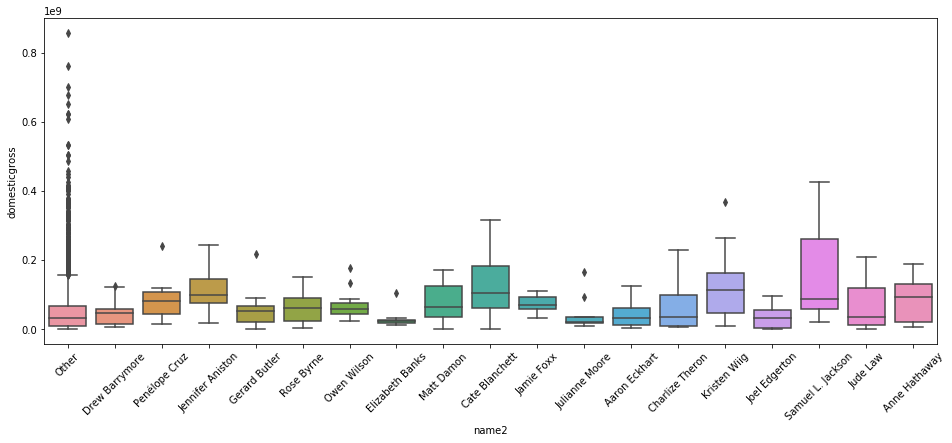

In [9]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='name2')

In [10]:
df['name3'].value_counts()

Other                 2924
John Goodman            12
Scarlett Johansson       9
Morgan Freeman           9
Mark Ruffalo             9
Willem Dafoe             7
Selma Blair              7
Rosario Dawson           7
Name: name3, dtype: int64

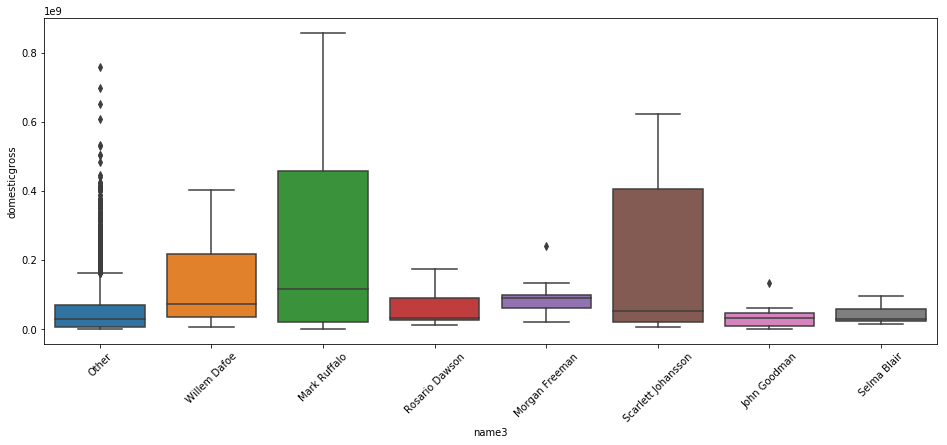

In [11]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='name3')

In [12]:
df['name5'].value_counts()

Other                 2825
Steven Soderbergh       15
Ridley Scott            13
Steven Spielberg        13
Ron Howard              12
Clint Eastwood          11
Shawn Levy              11
Tim Burton              11
Michael Bay             10
Guy Ritchie              9
David Gordon Green       9
Christopher Nolan        9
Peter Jackson            9
Martin Scorsese          9
Todd Phillips            9
M. Night Shyamalan       9
Name: name5, dtype: int64

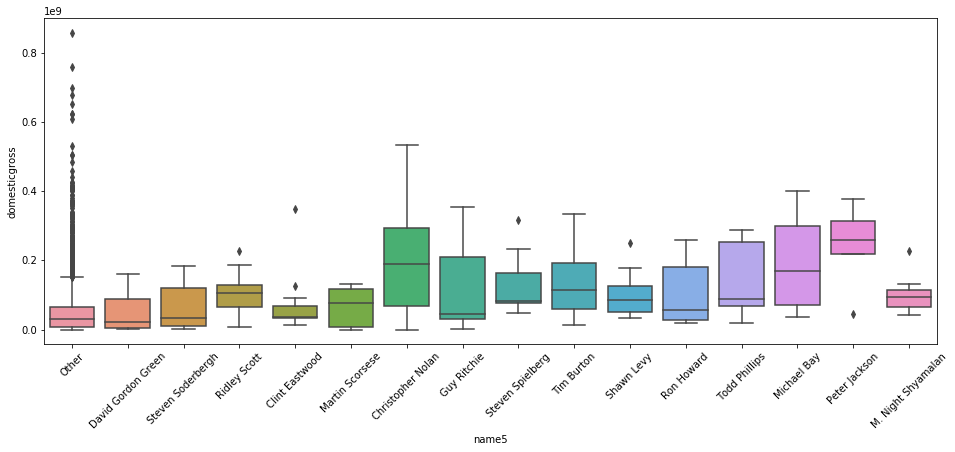

In [13]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='name5')

In [14]:
df['genre1'].value_counts()

Action         806
Comedy         778
Drama          476
Adventure      280
Biography      188
Horror         172
Crime          158
Other           70
Documentary     56
Name: genre1, dtype: int64

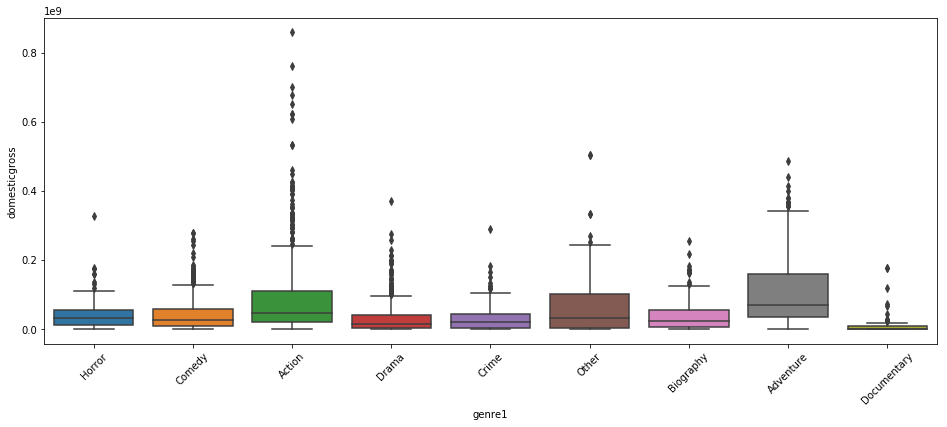

In [15]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='genre1')

In [16]:
df['genre2'].value_counts()

Drama        680
Adventure    351
             305
Crime        257
Romance      223
Comedy       212
Mystery      151
Animation    135
Thriller     134
Other        121
Family       100
Horror        94
Fantasy       90
Sci-Fi        69
Music         62
Name: genre2, dtype: int64

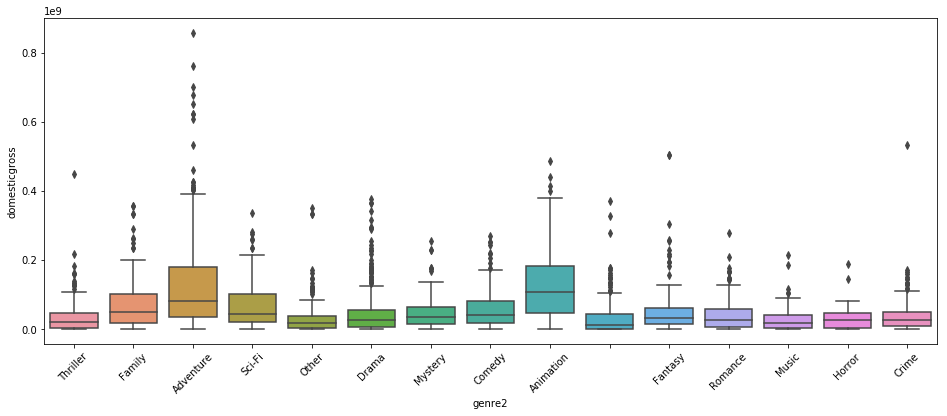

In [17]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='genre2')

In [18]:
df['genre3'].value_counts()

            1046
Thriller     342
Romance      245
Drama        230
Comedy       180
Sci-Fi       162
Fantasy      161
Family       119
Mystery      107
Other         97
Crime         85
Music         54
Sport         54
History       52
Horror        50
Name: genre3, dtype: int64

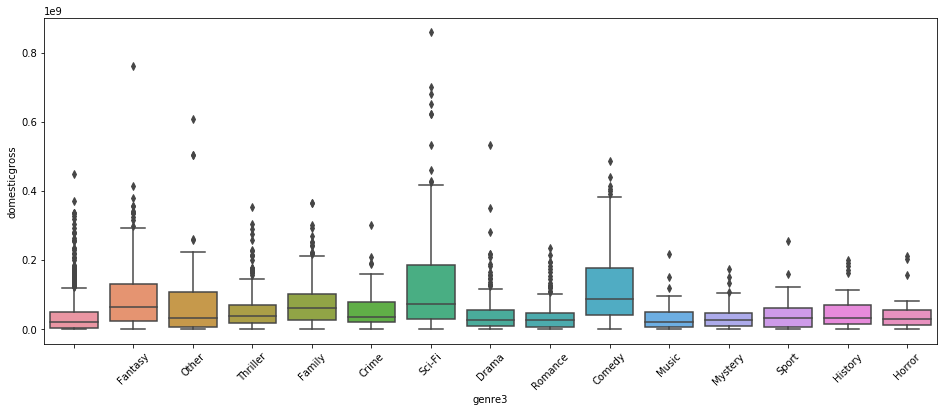

In [19]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='genre3')

In [20]:
df['keyword1'].value_counts()

Other                   2117
                         440
Romance                  104
3-D                       65
Animal Lead               43
Dysfunctional Family      42
Biography                 41
African-American          35
Marvel Comics             33
Coming of Age             32
Religious                 32
Name: keyword1, dtype: int64

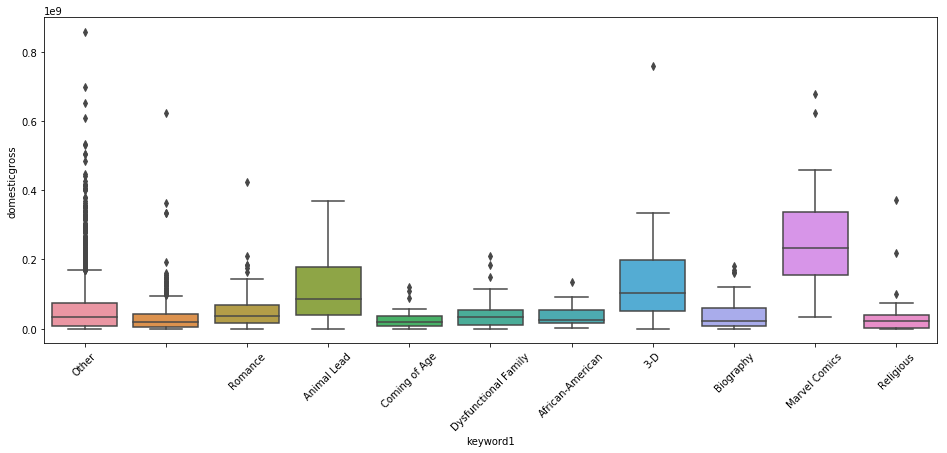

In [21]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='keyword1')

In [22]:
df['keyword2'].value_counts()

Other                        1842
                              860
 Romance                       72
 Talking Animals               37
 Visual Effects                31
 Religious                     27
 Dysfunctional Family          26
 Relationships Gone Wrong      25
 Animal Lead                   24
 Film Noir                     20
 Revenge                       20
Name: keyword2, dtype: int64

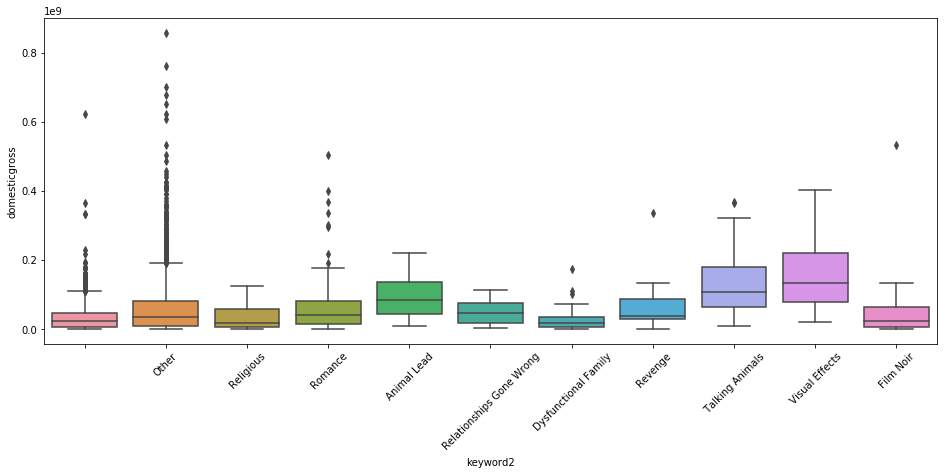

In [23]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='keyword2')

In [24]:
df['keyword3'].value_counts()

Other                    1718
                         1146
 Romance                   54
 Dysfunctional Family      40
 Revenge                   26
Name: keyword3, dtype: int64

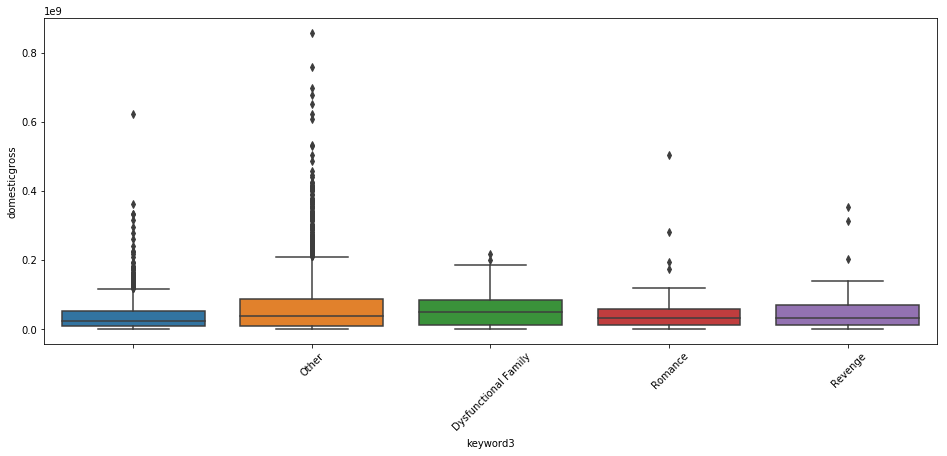

In [25]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='keyword3')

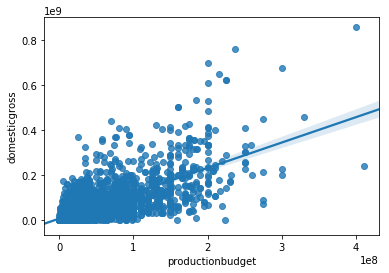

In [26]:
sns.regplot(data=df,x='productionbudget',y='domesticgross')

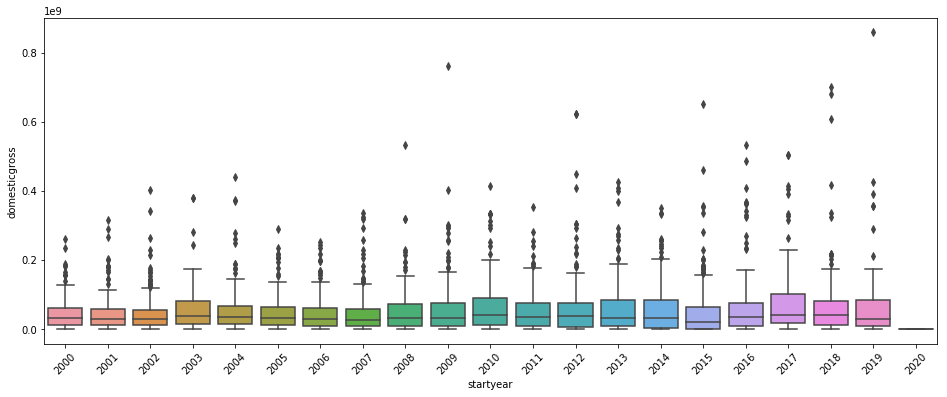

In [27]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='startyear')

In [28]:
df['releasedate']=pd.to_datetime(df['releasedate'])

In [29]:
df['week_number']=df['releasedate'].dt.week

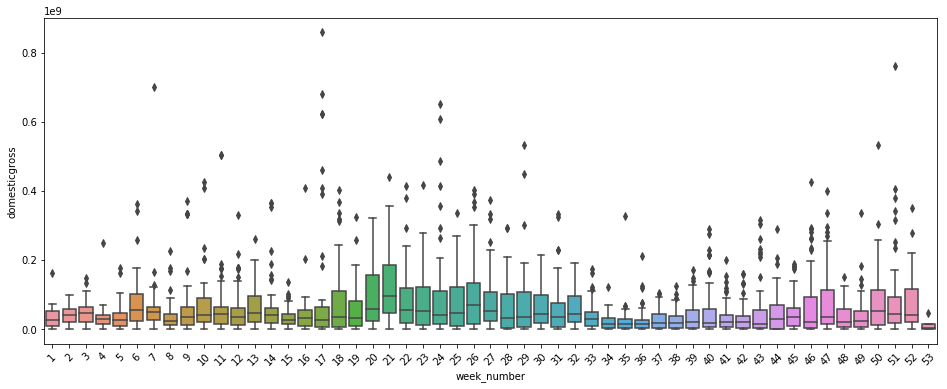

In [30]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='week_number')

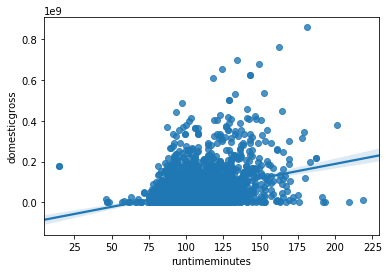

In [31]:
sns.regplot(data=df,x='runtimeminutes',y='domesticgross')

In [32]:
genre1_dummies = pd.get_dummies(df['genre1'], prefix='genre1')
genre2_dummies = pd.get_dummies(df['genre2'], prefix='genre2')
genre3_dummies = pd.get_dummies(df['genre3'], prefix='genre3')

keyword1_dummies = pd.get_dummies(df['keyword1'], prefix='keyword1')
keyword2_dummies = pd.get_dummies(df['keyword2'], prefix='keyword2')
keyword3_dummies = pd.get_dummies(df['keyword3'], prefix='keyword3')

name1_dummies = pd.get_dummies(df['name1'], prefix='name1')
name2_dummies = pd.get_dummies(df['name2'], prefix='name2')
name3_dummies = pd.get_dummies(df['name3'], prefix='name3')
name5_dummies = pd.get_dummies(df['name5'], prefix='name5')

studio_dummies = pd.get_dummies(df['studio'], prefix='studio')

df = pd.concat([df,genre1_dummies,genre2_dummies,genre3_dummies,keyword1_dummies,keyword2_dummies,keyword3_dummies,name1_dummies,name2_dummies,name3_dummies,name5_dummies],axis=1)

df.drop(['genre1','genre2','genre3','keyword1','keyword2','keyword3','name1','name2','name3','name5','studio'], axis=1, inplace=True)
df.drop(['keywords'], axis=1, inplace=True)
df.drop(['genre2_','genre3_','keyword1_','keyword2_','keyword3_'], axis=1, inplace=True)

In [33]:
df.head()

,primarytitle,domesticgross,productionbudget,releasedate,startyear,runtimeminutes,week_number,genre1_Action,genre1_Adventure,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Documentary,genre1_Drama,genre1_Horror,genre1_Other,genre2_Adventure,genre2_Animation,genre2_Comedy,genre2_Crime,genre2_Drama,genre2_Family,genre2_Fantasy,genre2_Horror,genre2_Music,genre2_Mystery,genre2_Other,genre2_Romance,genre2_Sci-Fi,genre2_Thriller,genre3_Comedy,genre3_Crime,genre3_Drama,genre3_Family,genre3_Fantasy,genre3_History,genre3_Horror,genre3_Music,genre3_Mystery,genre3_Other,genre3_Romance,genre3_Sci-Fi,genre3_Sport,genre3_Thriller,keyword1_3-D,keyword1_African-American,keyword1_Animal Lead,keyword1_Biography,keyword1_Coming of Age,keyword1_Dysfunctional Family,keyword1_Marvel Comics,keyword1_Other,keyword1_Religious,keyword1_Romance,keyword2_ Animal Lead,keyword2_ Dysfunctional Family,keyword2_ Film Noir,keyword2_ Relationships Gone Wrong,keyword2_ Religious,keyword2_ Revenge,keyword2_ Romance,keyword2_ Talking Animals,keyword2_ Visual Effects,keyword2_Other,keyword3_ Dysfunctional Family,keyword3_ Revenge,keyword3_ Romance,keyword3_Other,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Bateman,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Kristen Stewart,name1_Leonardo DiCaprio,name1_Liam Neeson,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Other,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Charlize Theron,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Kristen Wiig,name2_Matt Damon,name2_Other,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_John Goodman,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Other,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Selma Blair,name3_Willem Dafoe,name5_Christopher Nolan,name5_Clint Eastwood,name5_David Gordon Green,name5_Guy Ritchie,name5_M. Night Shyamalan,name5_Martin Scorsese,name5_Michael Bay,name5_Other,name5_Peter Jackson,name5_Ridley Scott,name5_Ron Howard,name5_Shawn Levy,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Todd Phillips
0,Halloween: Resurrection,30259652,15000000,2002-07-12,2002,94.0,28,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Halloween,159342015,10000000,2018-10-17,2018,106.0,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Halloween,159342015,10000000,2018-10-17,2018,106.0,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Freaky Friday,110222438,26000000,2003-08-06,2003,97.0,3

In [34]:
df[df['runtimeminutes'].isnull()]

,primarytitle,domesticgross,productionbudget,releasedate,startyear,runtimeminutes,week_number,genre1_Action,genre1_Adventure,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Documentary,genre1_Drama,genre1_Horror,genre1_Other,genre2_Adventure,genre2_Animation,genre2_Comedy,genre2_Crime,genre2_Drama,genre2_Family,genre2_Fantasy,genre2_Horror,genre2_Music,genre2_Mystery,genre2_Other,genre2_Romance,genre2_Sci-Fi,genre2_Thriller,genre3_Comedy,genre3_Crime,genre3_Drama,genre3_Family,genre3_Fantasy,genre3_History,genre3_Horror,genre3_Music,genre3_Mystery,genre3_Other,genre3_Romance,genre3_Sci-Fi,genre3_Sport,genre3_Thriller,keyword1_3-D,keyword1_African-American,keyword1_Animal Lead,keyword1_Biography,keyword1_Coming of Age,keyword1_Dysfunctional Family,keyword1_Marvel Comics,keyword1_Other,keyword1_Religious,keyword1_Romance,keyword2_ Animal Lead,keyword2_ Dysfunctional Family,keyword2_ Film Noir,keyword2_ Relationships Gone Wrong,keyword2_ Religious,keyword2_ Revenge,keyword2_ Romance,keyword2_ Talking Animals,keyword2_ Visual Effects,keyword2_Other,keyword3_ Dysfunctional Family,keyword3_ Revenge,keyword3_ Romance,keyword3_Other,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Bateman,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Kristen Stewart,name1_Leonardo DiCaprio,name1_Liam Neeson,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Other,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Charlize Theron,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Kristen Wiig,name2_Matt Damon,name2_Other,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_John Goodman,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Other,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Selma Blair,name3_Willem Dafoe,name5_Christopher Nolan,name5_Clint Eastwood,name5_David Gordon Green,name5_Guy Ritchie,name5_M. Night Shyamalan,name5_Martin Scorsese,name5_Michael Bay,name5_Other,name5_Peter Jackson,name5_Ridley Scott,name5_Ron Howard,name5_Shawn Levy,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Todd Phillips
46,Tenet,0,224000000,2020-07-17,2020,NaN,29,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
277,The Islands,0,1200000,2019-12-06,2019,NaN,49,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
868,Old Dogs,49492060,35000000,2009-11-25,2009,NaN,48,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
953,Sonic the Hedgehog,0,90000000,2020-02-14,2020,NaN,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [35]:
median_runtime = df['runtimeminutes'].median()
df['runtimeminutes'].fillna(median_runtime, inplace=True)

In [36]:
df_model = df.drop(['primarytitle','domesticgross','releasedate'], axis=1)
X = df.drop(['primarytitle','domesticgross','releasedate'], axis=1).values
y = df['domesticgross'].values

In [37]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

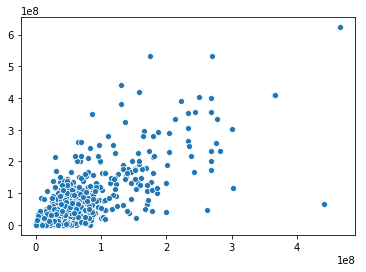

In [39]:
sns.scatterplot(y_pred,y_test)

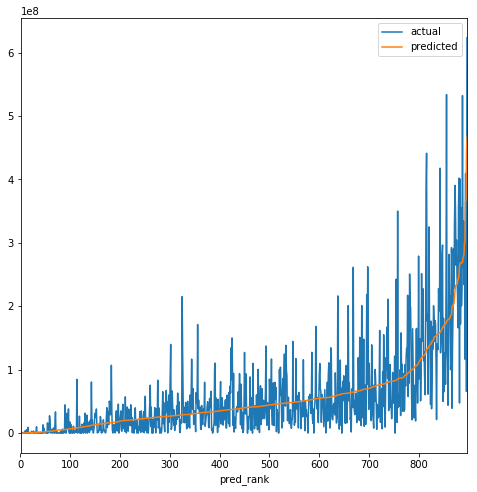

In [40]:
pred_actual = pd.DataFrame({'predicted':y_pred,'actual':y_test})
pred_actual['pred_rank'] = pred_actual['predicted'].rank()
pred_actual.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [41]:
from sklearn import metrics

print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y_test,y_pred)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y_test,y_pred)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))

Mean Absolute Error 30,142,025
Mean Squared Error 2,521,063,552,530,424
Root Mean Squared Error 50,210,194
Mean Value of Target 56,977,959
StDev of Target 77,275,771


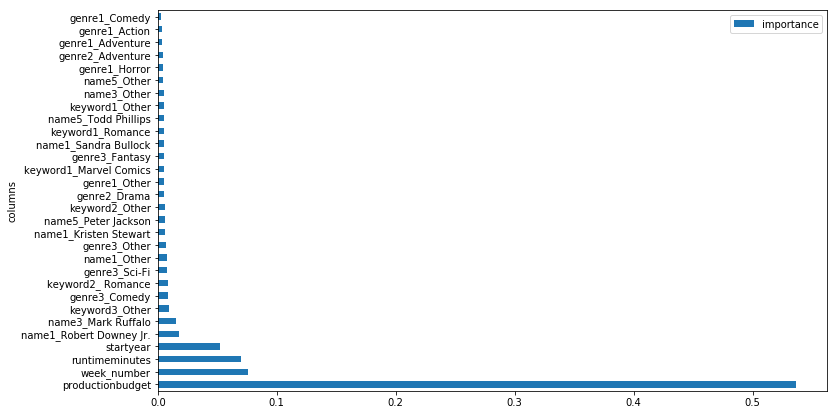

In [44]:
importance = pd.DataFrame({'columns':df_model.columns,'importance': regressor.feature_importances_})
importance.sort_values('importance',ascending=False,inplace=True)
importance[:30].plot('columns','importance','barh',figsize=(12,7))